## Imports and backend

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 2 * x - 1.5 * x**2 + 0.3 * x**3

def plot_2d(x_max, N_rectangles, SHOW_MARKERS = False, save_name = None):
    x = np.linspace(0, x_max, 1000)
    y = f(x)

    if N_rectangles <= 0:
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))

        ax.plot(x, y, label='f(x)', color = "tab:blue")

        ax.set_xlim(0, x_max)
        ax.set_ylim(0, max(y) * 1.05)

        ax.legend()
        ax.grid(color = "gainsboro", alpha = 0.7)

        ax.set_xlabel('x')

        ax.fill_between(x, y, color='tab:blue', alpha=0.5)

    else: 
        fig, axis = plt.subplots(1, 2, figsize=(9, 4))

        for ax in axis:
            ax.plot(x, y, label='f(x)', color = "tab:blue")

            ax.set_xlim(0, x_max)
            ax.set_ylim(0, max(y) * 1.05)

            ax.legend()
            ax.grid(color = "gainsboro", alpha = 0.7)

            ax.set_xlabel('x')
        
        axis[0].fill_between(x, y, color='tab:blue', alpha=0.5)

        dx = x_max / N_rectangles
        x_rect = np.linspace(0, x_max, N_rectangles + 1)
        rect_mids = (x_rect[:-1] + x_rect[1:]) / 2
        y_rect = f(rect_mids)
        for i in range(N_rectangles):
            axis[1].add_patch(plt.Rectangle((x_rect[i], 0), dx, y_rect[i], color='tab:green', alpha=0.5))
        
        if SHOW_MARKERS:
            axis[1].scatter(rect_mids, y_rect, color='tab:red', marker = "x")

        true_area = np.trapz(y, x)
        approx_area = np.sum(y_rect) * dx

        if (N_rectangles >=2)  and (N_rectangles <= 10):
            mid = (N_rectangles + 1) // 2
            ax.arrow(rect_mids[mid-1], 1.5, -dx/2, 0, head_width=0.1, head_length=0.05, fc='black', ec='black', length_includes_head=True)
            ax.arrow(rect_mids[mid-1], 1.5, dx/2, 0, head_width=0.1, head_length=0.05, fc='black', ec='black', length_includes_head=True)
            ax.annotate(r'$\Delta x$', (rect_mids[mid-1], 1.5), xytext=(rect_mids[mid-1], 1.6), fontsize=12, color='black')            

        print(f"True area: {true_area:.5f}")
        print(f"Approximated area: {approx_area:.5f}")

    if save_name:
        plt.savefig(save_name, dpi=300)

    plt.show()

## Actual demo

### Two dimensions

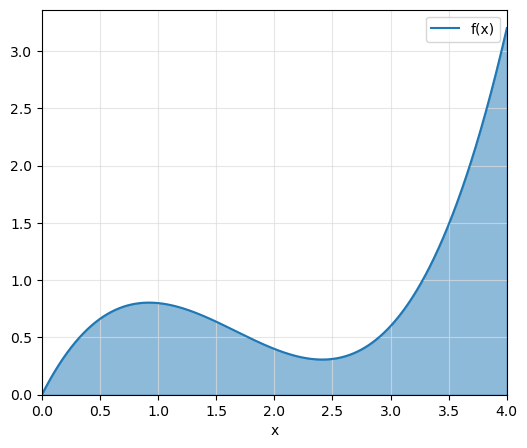

In [3]:
plot_2d(4, 0)

True area: 3.20000
Approximated area: 3.13600


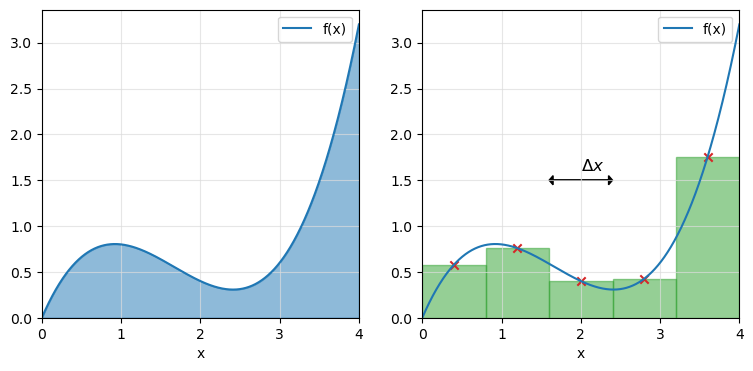

In [6]:
x_max = 4
N_rectangles = 5
SHOW_MARKERS = True

plot_2d(x_max, N_rectangles, SHOW_MARKERS=SHOW_MARKERS)